In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-08-01 21:17:54--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.48, 142.250.190.16, 142.250.190.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2023-08-01 21:17:54 (462 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [10]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(xs)
print(labels)
print(ys)
print(total_words)
print(max_sequence_len)
print(len(ys[0]))

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]
[  12   96 1217 ...  105  138  184]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2690
16
2690


In [12]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1500
377/377 [==============================] - 10s 14ms/step - loss: 6.8693 - accuracy: 0.0645
Epoch 2/1500
377/377 [==============================] - 6s 15ms/step - loss: 6.3958 - accuracy: 0.0657
Epoch 3/1500
377/377 [==============================] - 5s 14ms/step - loss: 6.2843 - accuracy: 0.0656
Epoch 4/1500
377/377 [==============================] - 5s 14ms/step - loss: 6.2100 - accuracy: 0.0663
Epoch 5/1500
377/377 [==============================] - 5s 14ms/step - loss: 6.1352 - accuracy: 0.0705
Epoch 6/1500
377/377 [==============================] - 5s 14ms/step - loss: 6.0652 - accuracy: 0.0735
Epoch 7/1500
377/377 [==============================] - 5s 14ms/step - loss: 6.0055 - accuracy: 0.0758
Epoch 8/1500
377/377 [==============================] - 5s 14ms/step - loss: 5.9475 - accuracy: 0.0781
Epoch 9/1500
377/377 [==============================] - 5s 14ms/step - loss: 5.8955 - accuracy: 0.0803
Epoch 10/1500
377/377 [==============================] - 5s 14ms/step - 

KeyboardInterrupt: 

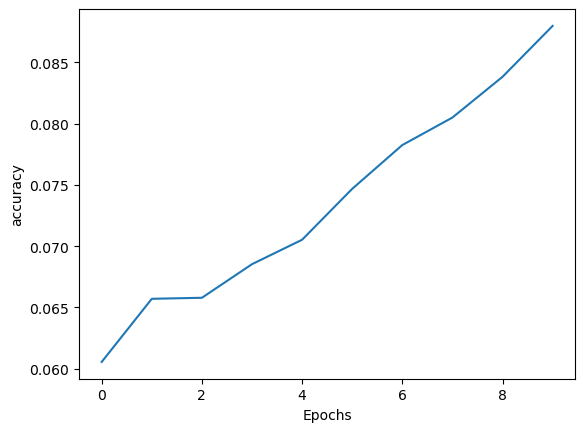

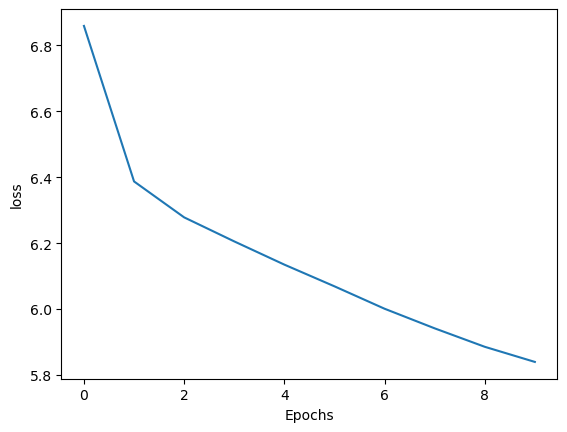

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
seed_text = "sweet jeremy saw dublin"

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#print(model.predict(token_list))  
#predicted = model.predict_classes(token_list)
predicted = np.argmax(model.predict(token_list), axis=-1)
pred_classes=model.predict(token_list)
print(pred_classes.reshape(-1)[predicted])
print(predicted)
for word, index in tokenizer.word_index.items():
	if index == predicted:
		print(word)
		break

[0.47551838]
[591]
pray


In [15]:
seed_text = "it was the best of times"
next_words = 100

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	#predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

it was the best of times deludhering i late young hand and sip darlin town where cross lead their stile of never looked corporal casey til in fray black hand until yearn by your eyes wexford and jewel and town the dust of toomebridge bright morn to mine cross fray their pretty white croppy whistle to play the night at the bit too sun out roof get huff returned for news thee darling thou storied covers a real mans said is aroon lie the li tide loo wall shell right way none me leane my eyes they wonder tarry until down on mythology dove cry oer
